<a href="https://colab.research.google.com/github/PaulaMateos/IRWA-2024-G_102_1/blob/main/Project_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Text Processing and Exploratory Data Analysis

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Load Python packages
Let's first import all the packages that you will need during this assignment.

In [4]:
import nltk
nltk.download('stopwords')
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import json
import pandas as pd
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Loading Dataset

In [5]:
evaluation = '/content/drive/Shared drives/IRWA/ProjectPart1/inputs/evaluation_gt.csv'
farmers_tweets = '/content/drive/Shared drives/IRWA/ProjectPart1/inputs/farmers-protest-tweets.json'
tweet_document_ids = '/content/drive/Shared drives/IRWA/ProjectPart1/inputs/tweet_document_ids_map.csv'

In [6]:
# Step 1: Load and Map Data
## Load JSON Data
with open(farmers_tweets, 'r') as f:
    tweet_data = [json.loads(line) for line in f]  # Assuming each line is a separate JSON object

# Convert JSON data to DataFrame
df_tweets = pd.DataFrame(tweet_data)

# Load the tweet-document ID map
doc_id_map = pd.read_csv(tweet_document_ids)

# Merge data to include `docId` in the tweet DataFrame
df_tweets = df_tweets.merge(doc_id_map, how='inner', left_on='id', right_on='id')

# Load Evaluation Data
evaluation_data = pd.read_csv(evaluation, delimiter=';')

## Step 1: Text Processing
- Remove Stop Words
- Punctuation
- Tokenize

### Stem

In [7]:
# Function to preprocess each tweet
def preprocess_tweet(tweet_content):
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()

    # Lowercase the tweet
    tweet_content = tweet_content.lower()
    tokenized_tweet = tweet_content.split()

    # Remove stop words and punctuation, apply stemming
    processed_tokens = [ps.stem(word) for word in tokenized_tweet if word.isalpha() and word not in stop_words]

    # Return the processed text as a string
    return ' '.join(processed_tokens)

# Apply preprocessing to the tweets
# for tweet in df_tweets:
#     tweet['processed_content'] = preprocess_tweet(tweet['content'])
for index, tweet in df_tweets.iterrows():
    df_tweets.at[index, 'processed_content'] = preprocess_tweet(tweet['content'])

# Store the processed content inside a dictionary with the document as key and the processed content as value
processed_tweets = dict(zip(df_tweets['docId'], df_tweets['processed_content']))

In [8]:
print(df_tweets.head(1)["content"])
print(df_tweets.head(1)["processed_content"])
print(processed_tweets)

0    The world progresses while the Indian police a...
Name: content, dtype: object
0    world progress indian polic govt still tri tak...
Name: processed_content, dtype: object
{'doc_0': 'world progress indian polic govt still tri take india back horrif past shame', 'doc_1': 'farmer constantli distroy crop throughout heart care crop like agricultur minist laugh', 'doc_2': 'watch full video', 'doc_3': 'watch full video', 'doc_4': 'watch full video', 'doc_5': 'anoth malkeet singh hoshiarpur pass away delhi protest', 'doc_6': 'hi tell boss thank', 'doc_7': 'watch full video', 'doc_8': 'despit increas must increas', 'doc_9': 'mockeri menac', 'doc_10': 'watch full video', 'doc_11': 'left hear lol', 'doc_12': 'give new hope unit countri discount hatr unit promot uniti divers true proudindian beinghuman', 'doc_13': 'anoth malkeet singh hoshiarpur pass away delhi protest', 'doc_14': 'pride britain chariti hero help poor india farmer fight govern battl', 'doc_15': 'common pleas find time elect

## Step 2: Exploratory Data Analysis

### Word Count Distribution

Average sentence length: 8.006359825724257


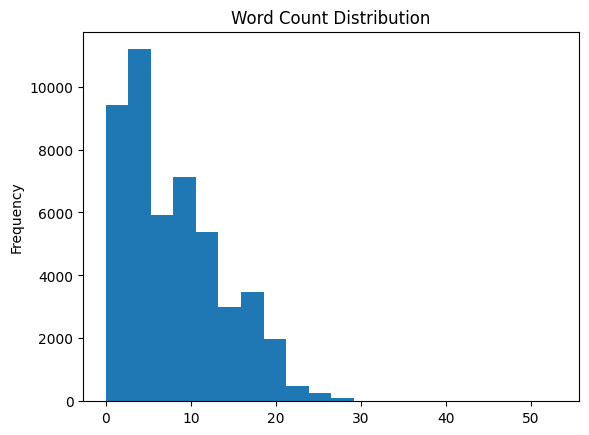

In [9]:
# Word count distribution based on preprocessed tweets
df_tweets['word_count'] = df_tweets['processed_content'].apply(lambda x: len(x.split()))

# Average sentence length
average_sentence_length = df_tweets['word_count'].mean()
print(f'Average sentence length: {average_sentence_length}')

# Word count distribution
df_tweets['word_count'].plot(kind='hist', bins=20, title='Word Count Distribution')
plt.show()


### Vocabulary Size

In [10]:
# Get all words from the processed content
all_words = ' '.join(df_tweets['processed_content']).split()

# Vocabulary size (unique words)
vocabulary_size = len(set(all_words))
print(f'Vocabulary size: {vocabulary_size}')


Vocabulary size: 15637


### Top Retweeted Tweets

In [11]:
# Top 5 most retweeted tweets
most_retweeted = df_tweets[['content', 'retweetCount']].sort_values(by='retweetCount', ascending=False).head(5)
print("Most retweeted tweets:")
display(most_retweeted)


Most retweeted tweets:


content  retweetCount
3203   There's a #FarmersProtest happening in Germany...          6164
38410  disha ravi, a 21-year-old climate activist, ha...          4673
38012  Disha Ravi broke down in court room and told j...          3742
46206  Farmers are so sweet. Y’all have to see this @...          3332
27071  india is targeting young women to silence diss...          3230

### Word Cloud

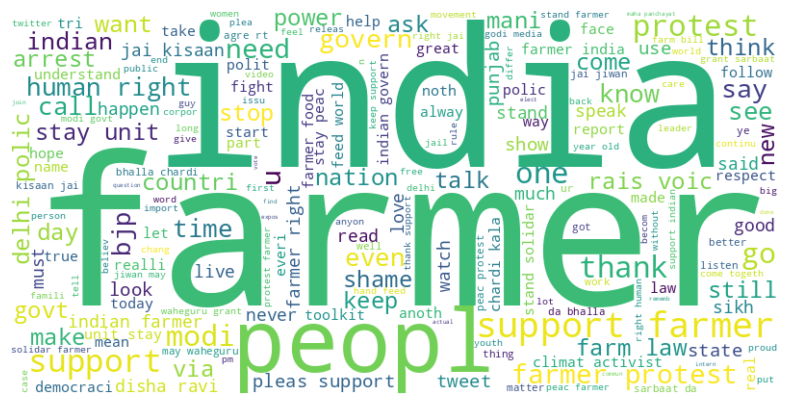

In [12]:
from wordcloud import WordCloud

# Generate a word cloud from the processed content
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Entity Recognition

In [13]:
import spacy

# Load the spaCy model for NER
nlp = spacy.load('en_core_web_sm')

# Apply NER to a few sample tweets
for tweet in df_tweets['content'].head(5):
    doc = nlp(tweet)
    print(f"\nTweet: {tweet}")
    for ent in doc.ents:
        print(f"Entity: {ent.text}, Label: {ent.label_}")



Tweet: The world progresses while the Indian police and Govt are still trying to take India back to the horrific past through its tyranny. 

@narendramodi @DelhiPolice Shame on you. 

#ModiDontSellFarmers 
#FarmersProtest 
#FreeNodeepKaur https://t.co/es3kn0IQAF
Entity: Indian, Label: NORP
Entity: Govt, Label: ORG
Entity: India, Label: GPE
Entity: FarmersProtest, Label: MONEY

Tweet: #FarmersProtest 
#ModiIgnoringFarmersDeaths 
#ModiDontSellFarmers 
@Kisanektamorcha 
Farmers constantly distroying crops throughout India. 
Really, it's hearts breaking...we care about our crops like our children. And govt. agriculture minister is laughing on us🚜🌾WE WILL WIN💪 https://t.co/kLspngG9xE
Entity: FarmersProtest, Label: ORG
Entity: #ModiIgnoringFarmersDeaths, Label: MONEY
Entity: Farmers, Label: ORG
Entity: India, Label: GPE
Entity: 🚜, Label: GPE
Entity: https://t.co/kLspngG9xE, Label: GPE

Tweet: @ReallySwara @rohini_sgh watch full video here https://t.co/wBPNdJdB0n
#farmersprotest #NoFarmersNo

In [14]:
!pip install squarify

### Tree map of the top hastags

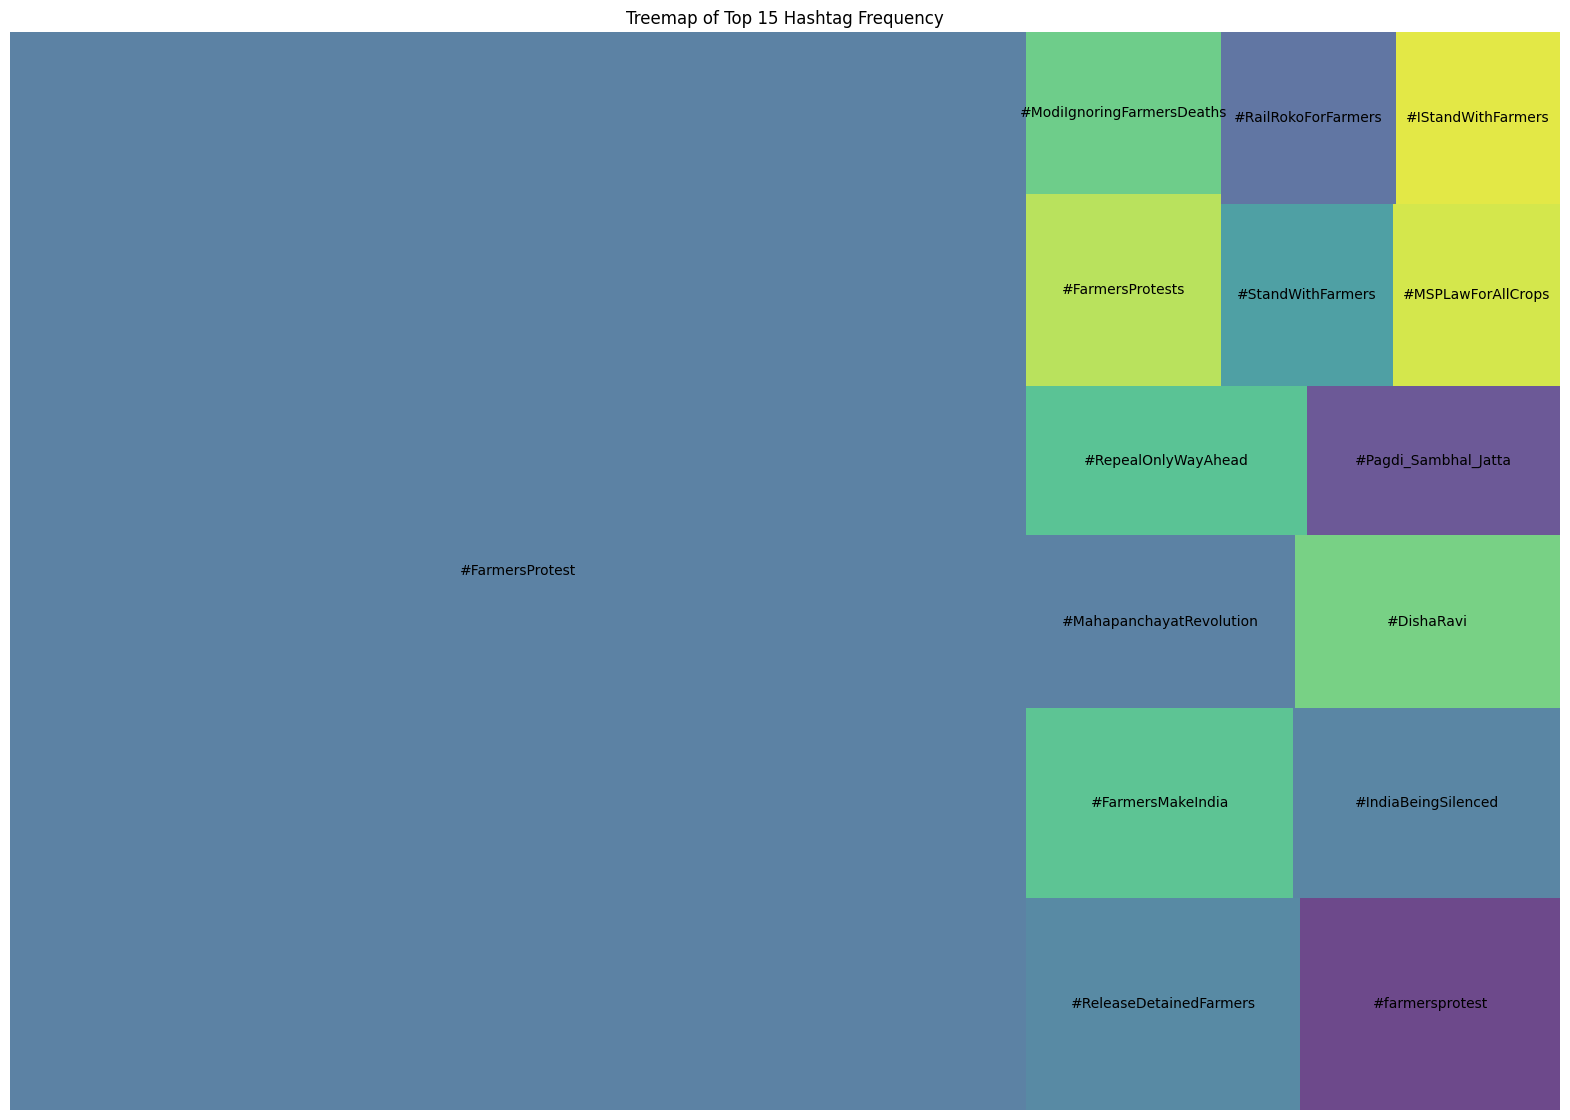

In [15]:
from collections import Counter
import squarify
import re
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Extract hashtags from the original tweets (content)
df_tweets['hashtags'] = df_tweets['content'].apply(lambda x: re.findall(r'#\w+', x))

# Flatten the list of hashtags
all_hashtags = [hashtag for hashtags in df_tweets['hashtags'] for hashtag in hashtags]

# Get the frequency distribution of hashtags
hashtag_counts = Counter(all_hashtags)

# Get the top 15 hashtags
top_hashtags = hashtag_counts.most_common(15)

# Create a DataFrame for the treemap
hashtag_df = pd.DataFrame(top_hashtags, columns=['hashtag', 'count'])

# Plot the treemap (with the top 15 hashtags)
plt.figure(figsize=(20, 14))
squarify.plot(sizes=hashtag_df['count'], label=hashtag_df['hashtag'], alpha=.8)
plt.title('Treemap of Top 15 Hashtag Frequency')
plt.axis('off')
plt.show()



### Time visualitzation of the publicated tweets

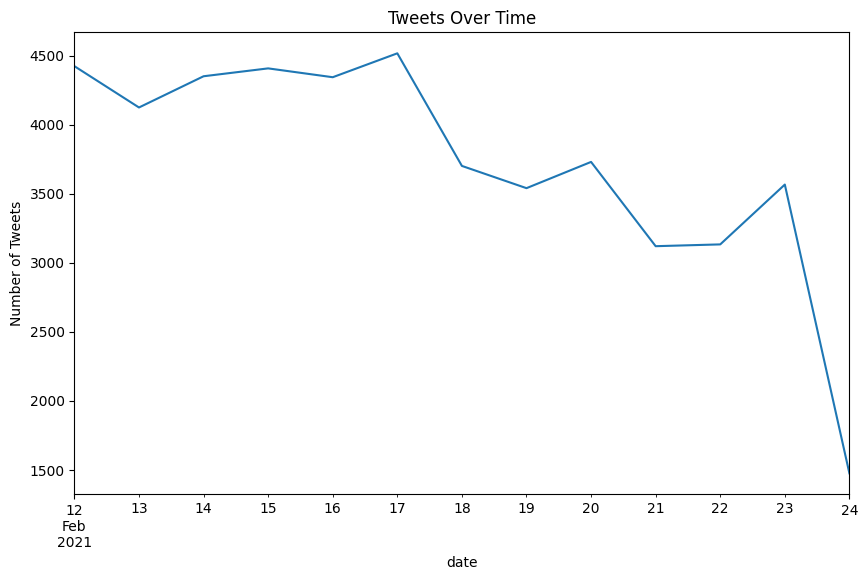

In [16]:
# Convert the 'date' column to datetime
df_tweets['date'] = pd.to_datetime(df_tweets['date'])

# Create a time series plot for tweet frequency over time
df_tweets.set_index('date', inplace=True)
df_tweets['tweet_count'] = 1

# Resample the data by day or hour and plot
daily_tweets = df_tweets['tweet_count'].resample('D').sum()
daily_tweets.plot(figsize=(10,6), title='Tweets Over Time')
plt.ylabel('Number of Tweets')
plt.show()


### Top users by tweet count

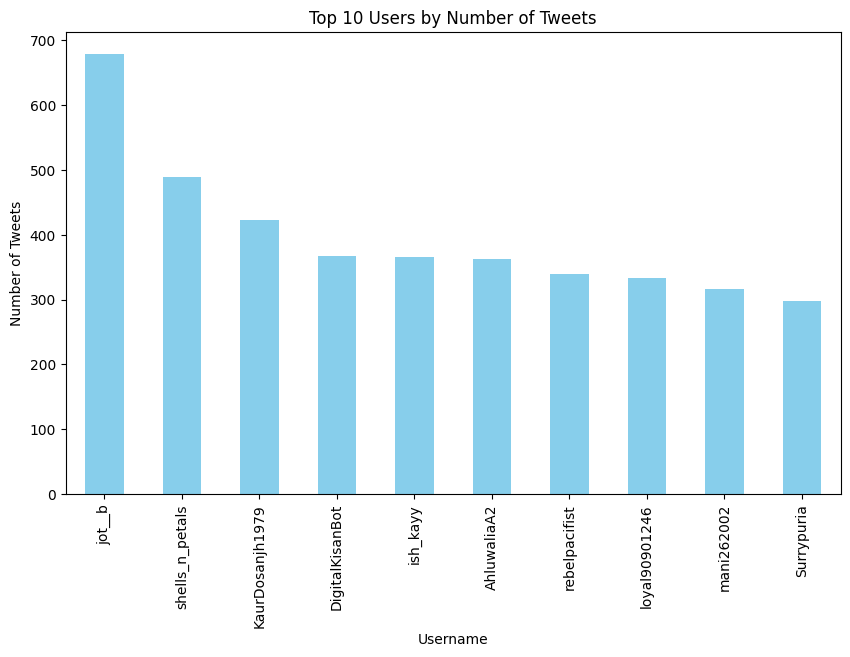

In [17]:
# Find the top 10 users by tweet count (based on 'username' field)
top_users = df_tweets['user'].apply(lambda x: x['username']).value_counts().head(10)

# Plot the top users by username
top_users.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Top 10 Users by Number of Tweets')
plt.ylabel('Number of Tweets')
plt.xlabel('Username')
plt.show()



### Retweets vs likes correlation

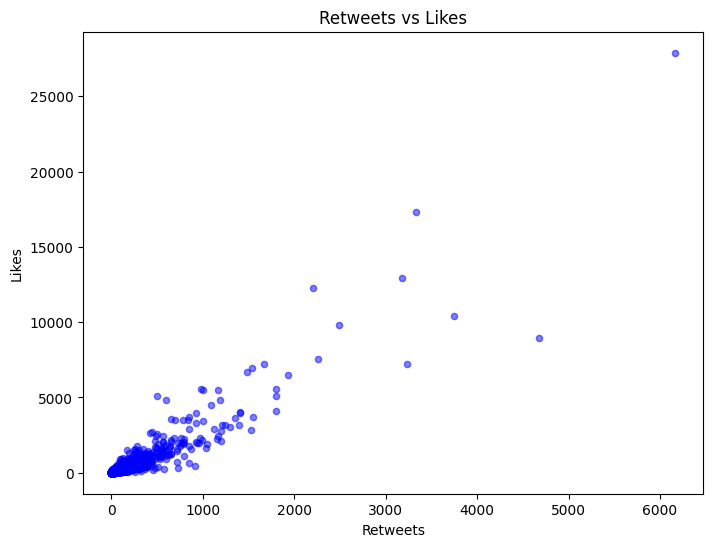

In [18]:
# Scatter plot for retweets vs likes
df_tweets.plot(kind='scatter', x='retweetCount', y='likeCount', alpha=0.5, color='blue', figsize=(8,6), title='Retweets vs Likes')
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.show()


### Heatmap

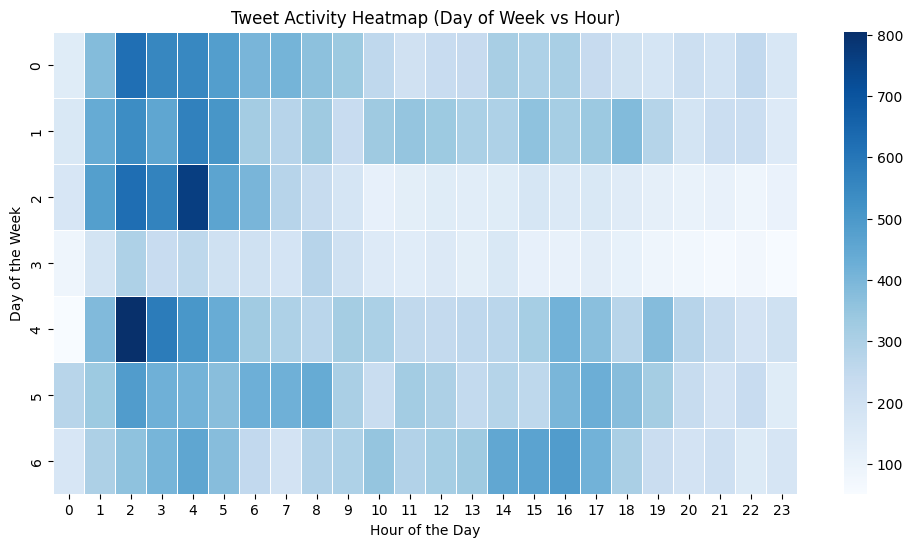

In [19]:
# Create new columns for hour and day of the week
df_tweets['hour'] = df_tweets.index.hour
df_tweets['day_of_week'] = df_tweets.index.dayofweek

# Pivot table to create a matrix for the heatmap
heatmap_data = df_tweets.pivot_table(index='day_of_week', columns='hour', values='tweet_count', aggfunc='sum')

# Plot heatmap
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=.5)
plt.title('Tweet Activity Heatmap (Day of Week vs Hour)')
plt.ylabel('Day of the Week')
plt.xlabel('Hour of the Day')
plt.show()


## Step 3: Indexing

In [20]:
from collections import defaultdict

# Initialize an empty inverted index using defaultdict
inverted_index = defaultdict(list)

# Iterate over each tweet in the DataFrame
for index, row in df_tweets.iterrows():
    doc_id = row['docId']  # This is the tweet's document ID
    terms = row['processed_content'].split()  # Tokenized terms from the processed tweet content

    # For each term, add the docId to the inverted index
    for term in terms:
        if doc_id not in inverted_index[term]:  # Avoid duplicate docIds for the same term
            inverted_index[term].append(doc_id)

# Example: Check the inverted index for a few terms
for term, docs in list(inverted_index.items())[:5]:  # Show only the first 5 terms for brevity
    print(f"{term}: {docs}")


world: ['doc_0', 'doc_38', 'doc_52', 'doc_86', 'doc_143', 'doc_187', 'doc_252', 'doc_460', 'doc_508', 'doc_519', 'doc_689', 'doc_913', 'doc_1057', 'doc_1066', 'doc_1346', 'doc_1377', 'doc_1451', 'doc_1479', 'doc_1502', 'doc_1563', 'doc_1570', 'doc_1685', 'doc_1727', 'doc_1835', 'doc_1843', 'doc_1900', 'doc_1920', 'doc_2110', 'doc_2127', 'doc_2181', 'doc_2410', 'doc_2413', 'doc_2452', 'doc_2506', 'doc_2580', 'doc_2636', 'doc_2683', 'doc_2726', 'doc_2854', 'doc_3014', 'doc_3078', 'doc_3105', 'doc_3182', 'doc_3292', 'doc_3503', 'doc_3527', 'doc_3554', 'doc_3622', 'doc_3726', 'doc_3737', 'doc_3764', 'doc_3765', 'doc_3767', 'doc_3771', 'doc_3772', 'doc_3774', 'doc_3777', 'doc_3781', 'doc_3783', 'doc_3785', 'doc_3787', 'doc_3790', 'doc_3836', 'doc_3846', 'doc_3848', 'doc_3854', 'doc_3856', 'doc_3860', 'doc_3861', 'doc_3863', 'doc_3866', 'doc_3919', 'doc_4190', 'doc_4240', 'doc_4255', 'doc_4260', 'doc_4264', 'doc_4269', 'doc_4310', 'doc_4323', 'doc_4325', 'doc_4327', 'doc_4329', 'doc_4333', '

## Step 4: Evaluation

In [21]:
# Function to process the query and retrieve documents
def query_inverted_index(query, inverted_index):
    # Preprocess the query (similar to tweet preprocessing)
    query = preprocess_tweet(query)
    terms = query.split()

    # Find the documents that contain all the terms (conjunctive query)
    if not terms:
        return []

    # Start with the list of documents for the first term
    result_docs = set(inverted_index.get(terms[0], []))

    # Intersect with documents of the remaining terms
    for term in terms[1:]:
        result_docs &= set(inverted_index.get(term, []))

    return list(result_docs)

# Example query
query = "people's rights"
result_docs = query_inverted_index(query, inverted_index)

print(f"Documents containing all terms in '{query}': {result_docs}")


Documents containing all terms in 'people's rights': ['doc_32051', 'doc_18662', 'doc_2828', 'doc_10498', 'doc_4347', 'doc_35131', 'doc_40541', 'doc_35105', 'doc_35354', 'doc_13508', 'doc_34689', 'doc_45785', 'doc_23688', 'doc_3632', 'doc_25033', 'doc_44075', 'doc_6630', 'doc_21127', 'doc_24481', 'doc_22526', 'doc_27899', 'doc_25097', 'doc_17416', 'doc_21007', 'doc_22274', 'doc_12081', 'doc_47295', 'doc_1336', 'doc_13229', 'doc_34949', 'doc_41749', 'doc_47149', 'doc_23166', 'doc_35106', 'doc_6840', 'doc_30836', 'doc_47282', 'doc_17735', 'doc_18594', 'doc_38711', 'doc_6545', 'doc_20348', 'doc_38370', 'doc_23121', 'doc_13377', 'doc_42715', 'doc_18461', 'doc_41865', 'doc_41081', 'doc_17871', 'doc_38427', 'doc_30657', 'doc_25443', 'doc_14604', 'doc_36599', 'doc_25042', 'doc_25234', 'doc_23286', 'doc_23338', 'doc_13290', 'doc_31050', 'doc_3779', 'doc_25497', 'doc_10918', 'doc_25898', 'doc_30794', 'doc_11418', 'doc_14740', 'doc_21385', 'doc_3519', 'doc_22069', 'doc_43618', 'doc_8201', 'doc_13

First, we'll compute the term frequency in the tweets. This will help identify the most common and popular terms, which can be useful for constructing queries.

In [22]:
from collections import defaultdict
import math
import numpy as np

# def create_index_tfidf(inverted_index, query, token_tweets):
#     N = len(token_tweets)
#     scores = defaultdict(float)
#     query = preprocess_tweet(query).split()
#     # For each term in the query
#     for term in query:
#         if term in inverted_index:
#             df = len(inverted_index[term])
#             idf = math.log(N / (1+df))

#             for doc_id in inverted_index[term]:
#                 tf = token_tweets[doc_id].count(term)
#                 scores[doc_id] += tf * idf

#     return dict(scores)

def create_index_tfidf(inverted_index, query, processed_tweets):
    """
    Ranks documents based on TF-IDF relevance to a query.

    Arguments:
    inverted_index -- the inverted index with terms as keys and lists of doc_ids as values.
    query -- the user query to match against documents.
    processed_tweets -- dictionary with docId as keys and processed tweet content as values.

    Returns:
    ranked_docs -- dictionary of doc_ids and their relevance scores, ranked by TF-IDF.
    """
    num_documents = len(processed_tweets)
    ranked_docs = defaultdict(float)

    # Preprocess the query
    query_terms = preprocess_tweet(query).split()

    # Calculate DF, IDF, and TF on-the-fly
    for term in query_terms:
        if term in inverted_index:
            df = len(inverted_index[term])  # Document Frequency (DF)
            idf = math.log(num_documents / (1 + df), 2)  # Inverse Document Frequency (IDF)

            for doc_id in inverted_index[term]:
                document_content = processed_tweets[doc_id]
                terms_in_doc = document_content.split()
                term_count = Counter(terms_in_doc)
                tf = term_count[term] / len(terms_in_doc)  # Term Frequency (TF)

                tf_idf_score = tf * idf  # Calculate TF-IDF score
                ranked_docs[doc_id] += tf_idf_score  # Accumulate score for documents

    # Sort documents by TF-IDF score in descending order
    ranked_docs = dict(sorted(ranked_docs.items(), key=lambda item: item[1], reverse=True))

    return ranked_docs


In [23]:
from collections import Counter

# Create a single list of all terms from the processed tweets
all_terms = []

# Iterate over the preprocessed content of each tweet and collect terms
for index, row in df_tweets.iterrows():
    all_terms.extend(row['processed_content'].split())

# Count the frequency of each term
term_frequencies = Counter(all_terms)

# Display the 10 most common terms
common_terms = term_frequencies.most_common(10)
print("Top 10 common terms:", common_terms)


Top 10 common terms: [('farmer', 12491), ('support', 5651), ('india', 3934), ('protest', 3689), ('peopl', 2975), ('right', 2875), ('indian', 2792), ('modi', 2209), ('govern', 2133), ('stand', 2085)]


In [24]:
# create 5 queries and output its ranking with this words: Top 10 common terms: [('farmer', 12491), ('support', 5651), ('india', 3934), ('protest', 3689), ('peopl', 2975), ('right', 2875), ('indian', 2792), ('modi', 2209), ('govern', 2133), ('stand', 2085)]
q1 = "India supports farmers"
q2 = "People support farmers"
q3 = "Framer rights"
q4 = "Protests against government"
q5 = "Thank farmers"

queries = [q1, q2, q3, q4, q5]

# See rank for each query
for q in queries:
  temp_rank_docs = create_index_tfidf(inverted_index, q, processed_tweets)
  print(f"Ranked documents for query '{q}': {temp_rank_docs}")

Ranked documents for query 'India supports farmers': {'doc_1791': 3.7394203831529285, 'doc_2333': 3.7394203831529285, 'doc_3293': 3.7394203831529285, 'doc_5139': 3.7394203831529285, 'doc_6257': 3.7394203831529285, 'doc_7716': 3.7394203831529285, 'doc_20619': 3.7394203831529285, 'doc_21506': 3.7394203831529285, 'doc_24075': 3.7394203831529285, 'doc_26830': 3.7394203831529285, 'doc_27786': 3.7394203831529285, 'doc_30892': 3.7394203831529285, 'doc_32687': 3.7394203831529285, 'doc_33333': 3.7394203831529285, 'doc_33366': 3.7394203831529285, 'doc_21799': 3.477414554257229, 'doc_595': 3.21540872536153, 'doc_1268': 3.21540872536153, 'doc_1360': 3.21540872536153, 'doc_1830': 3.21540872536153, 'doc_1877': 3.21540872536153, 'doc_4444': 3.21540872536153, 'doc_4469': 3.21540872536153, 'doc_4988': 3.21540872536153, 'doc_5239': 3.21540872536153, 'doc_5700': 3.21540872536153, 'doc_5845': 3.21540872536153, 'doc_6024': 3.21540872536153, 'doc_6028': 3.21540872536153, 'doc_6939': 3.21540872536153, 'doc_7

### 3 - Metrics for Ranking

#### Binary Relevance

To compute *Precision@K, Mean Average Precision* and *Mean Reciprocal Rank*, we need binary relevance (1 = relevant, 0 = not relevant).


To simplify the task, we will consider as relevant **all documents that have actual score (doc_score) equal or higher than $2$**, and not-relevant **the remaining documents**.

Let's add a column `is_relevant` to our previous table `search_results` following the above rule about **relevance**.

In [25]:
evaluation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   docId     60 non-null     object 
 1   query_id  60 non-null     float64
 2   label     60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [26]:
# drop NaN values
evaluation_data = evaluation_data.dropna()
# change datatype label to int
evaluation_data['label'] = evaluation_data['label'].astype(int)

In [27]:
query1 = "people's rights"
ranked_docs1 = create_index_tfidf(inverted_index, query, processed_tweets)

# Create dataset with doc_id, query_id and ranking
df_ranked1 = pd.DataFrame(list(ranked_docs1.items()), columns=['doc_id', 'ranking'])

# Query 1
for doc_id, ranking in ranked_docs1.items():
  # Put the doc_id
  df_ranked1.loc[df_ranked1['doc_id'] == doc_id, 'doc_id'] = doc_id
  # Put the ranking
  df_ranked1.loc[df_ranked1['doc_id'] == doc_id, 'ranking'] = ranking
  # Put query
  df_ranked1.loc[df_ranked1['doc_id'] == doc_id, 'query_id'] = 1


# Now do the same for query 2
query2 = "Indian Government"
ranked_docs2 = create_index_tfidf(inverted_index, query2, processed_tweets)

# Create dataset with doc_id, query_id and ranking
df_ranked2 = pd.DataFrame(list(ranked_docs2.items()), columns=['doc_id', 'ranking'])

for doc_id, ranking in ranked_docs2.items():
  # Put the doc_id
  df_ranked2.loc[df_ranked2['doc_id'] == doc_id, 'doc_id'] = doc_id
  # Put the ranking
  df_ranked2.loc[df_ranked2['doc_id'] == doc_id, 'ranking'] = ranking
  # Put query
  df_ranked2.loc[df_ranked2['doc_id'] == doc_id, 'query_id'] = 2

# Concatenate both ranked dataframes into df_ranked
df_ranked = pd.concat([df_ranked1, df_ranked2], ignore_index=True)

# Strip any potential whitespace
df_ranked['doc_id'] = df_ranked['doc_id'].str.strip()
evaluation_data['docId'] = evaluation_data['docId'].str.strip()

print(df_ranked)


         doc_id   ranking  query_id
0       doc_166  4.297383       1.0
1      doc_1884  4.297383       1.0
2      doc_2103  4.297383       1.0
3      doc_2600  4.297383       1.0
4      doc_2603  4.297383       1.0
...         ...       ...       ...
6656  doc_28977  0.150314       2.0
6657  doc_29023  0.150314       2.0
6658  doc_29053  0.150314       2.0
6659  doc_29039  0.145130       2.0
6660  doc_41063  0.145130       2.0

[6661 rows x 3 columns]


In [28]:
# look for doc_156 bear in mind the doc id is a string
# Assuming df_ranked is your DataFrame

row = df_ranked[df_ranked['doc_id'] == 'doc_166']

print(row)

    doc_id   ranking  query_id
0  doc_166  4.297383       1.0


In [29]:
df_ranked_merged = pd.merge(evaluation_data, df_ranked, left_on=['docId', 'query_id'], right_on=['doc_id', 'query_id'], how='left')

# Drop the redundant 'docId' column after the merge
df_ranked_merged.drop(columns=['doc_id'], inplace=True)

# Fill all NaN rows with 0 which means that it hasn't found any relevant information
df_ranked_merged.fillna(0, inplace=True)

# Rename the columns for better representation
df_ranked_merged.columns = ["doc_id", "query_id", "is_relevant", "predicted_relevance" ]

# Normalize the ranking
mean_ranked_merged = df_ranked_merged['predicted_relevance'].mean()
std_ranked_merged = df_ranked_merged['predicted_relevance'].std()
df_ranked_merged['predicted_relevance'] = (df_ranked_merged['predicted_relevance'] - mean_ranked_merged) / std_ranked_merged

queries = {1.0: query1,
           2.0: query2}

# Print the resulting table
for query in df_ranked_merged['query_id'].unique():
    print(f"Relevant documents for query {query}, {queries[query]}: {df_ranked_merged[df_ranked_merged['query_id'] == query]['is_relevant'].sum()}")

Relevant documents for query 1.0, people's rights: 15
Relevant documents for query 2.0, Indian Government: 15


In [30]:
df_ranked_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   doc_id               60 non-null     object 
 1   query_id             60 non-null     float64
 2   is_relevant          60 non-null     int64  
 3   predicted_relevance  60 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB


Tests to try solve the errors on similarity
###Delete when handing in

# Step 4: Evaluation Metrics
Comparing the ranked results to a ground truth set of relevant documents.

- **Precision@K (P@K):** Precision measures the proportion of relevant documents among the top-K retrieved documents.

- **Recall@K (R@K):** Recall measures the proportion of relevant documents retrieved out of all relevant documents.

- **F1-Score@K:** The harmonic mean of precision and recall.

- **Mean Average Precision (MAP):** The mean of the average precision scores for each query.

- **Mean Reciprocal Rank (MRR):** Measures the rank of the first relevant document in the list of results.

- **Normalized Discounted Cumulative Gain (NDCG):** Evaluates the ranking quality of the results by assigning higher relevance to documents that appear earlier in the result list.

## Precision@K and Recall@K

In [31]:
# Precision@K
def precision_and_recall_at_k(doc_score, y_score, k=10):
    """
    Parameters
    ----------
    doc_score: Ground truth (true relevance labels).
    y_score: Predicted scores.
    k : number of doc to consider.

    Returns
    -------
    precision @k : float
    recall @k : float

    """
    order = np.argsort(y_score)[::-1]
    doc_score = doc_score[order[:k]]
    relevant = sum(doc_score == 1)
    precision = float(relevant) / k

    total_relevant = sum(doc_score)
    if total_relevant == 0:
        recall = 0
    else:
        recall = float(relevant) / total_relevant
    return precision, recall

In [32]:
precision_k5, recall_k5 = precision_and_recall_at_k(df_ranked_merged['is_relevant'], df_ranked_merged['predicted_relevance'], k=5)
precision_k10, recall_k10 = precision_and_recall_at_k(df_ranked_merged['is_relevant'], df_ranked_merged['predicted_relevance'], k=10)
precision_k20, recall_k20 = precision_and_recall_at_k(df_ranked_merged['is_relevant'], df_ranked_merged['predicted_relevance'], k=20)
precision_k30, recall_k30 = precision_and_recall_at_k(df_ranked_merged['is_relevant'], df_ranked_merged['predicted_relevance'], k=30)

print(f"Precision@5: {precision_k5}, Recall@5: {recall_k5}")
print(f"Precision@10: {precision_k10}, Recall@10: {recall_k10}")
print(f"Precision@20: {precision_k20}, Recall@20: {recall_k20}")
print(f"Precision@30: {precision_k30}, Recall@30: {recall_k30}")

Precision@5: 0.8, Recall@5: 1.0
Precision@10: 0.8, Recall@10: 1.0
Precision@20: 0.75, Recall@20: 1.0
Precision@30: 0.7, Recall@30: 1.0


## F1-Score@K

In [33]:
# F1-Score@K
def f1_score_at_k(doc_score, y_score, k=10):
    """
    Parameters
    ----------
    doc_score: Ground truth (true relevance labels).
    y_score: Predicted scores.
    k : number of doc to consider.

    Returns
    -------
    f1_score @k : float

    """
    precision, recall = precision_and_recall_at_k(doc_score, y_score, k)
    if precision + recall == 0:
        return 0
    return 2 * precision * recall / (precision + recall)

In [34]:
f1_score_k5 = f1_score_at_k(df_ranked_merged['is_relevant'], df_ranked_merged['predicted_relevance'], k=5)
f1_score_k10 = f1_score_at_k(df_ranked_merged['is_relevant'], df_ranked_merged['predicted_relevance'], k=10)
f1_score_k20 = f1_score_at_k(df_ranked_merged['is_relevant'], df_ranked_merged['predicted_relevance'], k=20)
f1_score_k30 = f1_score_at_k(df_ranked_merged['is_relevant'], df_ranked_merged['predicted_relevance'], k=30)

print(f"F1-Score@5: {f1_score_k5}")
print(f"F1-Score@10: {f1_score_k10}")
print(f"F1-Score@20: {f1_score_k20}")
print(f"F1-Score@30: {f1_score_k30}")

F1-Score@5: 0.888888888888889
F1-Score@10: 0.888888888888889
F1-Score@20: 0.8571428571428571
F1-Score@30: 0.8235294117647058


## Average Precision@K

In [35]:
def avg_precision_at_k(doc_score, y_score, k=10):
    """
    Parameters
    ----------
    doc_score: Ground truth (true relevance labels).
    y_score: Predicted scores.
    k : number of doc to consider.

    Returns
    -------
    average precision @k : float
    """
    order = np.argsort(y_score)[::-1]  # get the list of indexes of the predicted score sorted in descending order.

    prec_at_i = 0
    prec_at_i_list = []
    number_of_relevant = 0
    number_to_iterate = min(k, len(order))

    for i in range(number_to_iterate):
        if doc_score[order[i]] == 1:
            number_of_relevant += 1
            prec_at_i = number_of_relevant / (i + 1)
            prec_at_i_list.append(prec_at_i)

    if number_of_relevant == 0:
        return 0
    else:
      return np.sum(prec_at_i_list) / number_of_relevant

In [36]:
avg_precision_k5 = avg_precision_at_k(np.array(df_ranked_merged["is_relevant"]), np.array(df_ranked_merged["predicted_relevance"]), k=5)
avg_precision_k10 = avg_precision_at_k(np.array(df_ranked_merged["is_relevant"]), np.array(df_ranked_merged["predicted_relevance"]), k=10)
avg_precision_k20 = avg_precision_at_k(np.array(df_ranked_merged["is_relevant"]), np.array(df_ranked_merged["predicted_relevance"]), k=20)
avg_precision_k30 = avg_precision_at_k(np.array(df_ranked_merged["is_relevant"]), np.array(df_ranked_merged["predicted_relevance"]), k=30)

print(f"Average Precision@5: {avg_precision_k5}")
print(f"Average Precision@10: {avg_precision_k10}")
print(f"Average Precision@20: {avg_precision_k20}")
print(f"Average Precision@30: {avg_precision_k30}")

Average Precision@5: 0.8875
Average Precision@10: 0.8240079365079365
Average Precision@20: 0.8139362927520823
Average Precision@30: 0.7898171630189175


In [37]:
# Check with 'average_precision_score' of 'sklearn' library
# https://scikit-learn.ru/example/precision-recall/
from sklearn.metrics import average_precision_score

k = 10
temp = df_ranked_merged.sort_values("predicted_relevance", ascending=False).head(k)
average_precision_score(np.array(temp["is_relevant"]), np.array(temp["predicted_relevance"][:k]))

0.8240079365079366

## Mean Average Precision@K

In [38]:
def map_at_k(search_res, k=10):
    """
    Parameters
    ----------
    search_res: search results dataset containing:
        query_id: query id.
        doc_id: document id.
        predicted_relevance: relevance predicted through LightGBM.
        doc_score: actual score of the document for the query (ground truth).

    Returns
    -------
    mean average precision @ k : float
    """
    avp = []
    for q in search_res["query_id"].unique():  # loop over all query id
        curr_data = search_res[search_res["query_id"] == q]  # select data for current query
        avp.append(avg_precision_at_k(np.array(curr_data["is_relevant"]),
                   np.array(curr_data["predicted_relevance"]), k))  #append average precision for current query
    return np.sum(avp) / len(avp), avp  # return mean average precision

In [39]:
map_k5, avp_k5 = map_at_k(df_ranked_merged, 5)
map_k10, avp_k10 = map_at_k(df_ranked_merged, 10)
map_k20, avp_k20 = map_at_k(df_ranked_merged, 20)
map_k30, avp_k30 = map_at_k(df_ranked_merged, 30)

print(f"MAP@5: {map_k5}")
print(f"MAP@10: {map_k10}")
print(f"MAP@20: {map_k20}")
print(f"MAP@30: {map_k30}")

MAP@5: 0.7104166666666667
MAP@10: 0.7709270282186949
MAP@20: 0.8049891576677292
MAP@30: 0.79488381988382


## Mean Reciprocal Rank

In [40]:
def rr_at_k(doc_score, y_score, k=10):
    """
    Parameters
    ----------
    doc_score: Ground truth (true relevance labels).
    y_score: Predicted scores.
    k : number of doc to consider.

    Returns
    -------
    Reciprocal Rank for qurrent query
    """

    order = np.argsort(y_score)[::-1]  # get the list of indexes of the predicted score sorted in descending order.
    doc_score = np.take(doc_score, order[:k])  # sort the actual relevance label of the documents based on predicted score(hint: np.take) and take first k.
    if np.sum(doc_score) == 0:  # if there are not relevant doument return 0
        return 0
    return 1 / (np.argmax(doc_score == 1) + 1)  # hint: to get the position of the first relevant document use "np.argmax"

In [41]:
rr_at_k5 = rr_at_k(np.array(df_ranked_merged["is_relevant"]), np.array(df_ranked_merged["predicted_relevance"]), k=5)
rr_at_k10 = rr_at_k(np.array(df_ranked_merged["is_relevant"]), np.array(df_ranked_merged["predicted_relevance"]), k=10)
rr_at_k20 = rr_at_k(np.array(df_ranked_merged["is_relevant"]), np.array(df_ranked_merged["predicted_relevance"]), k=20)
rr_at_k30 = rr_at_k(np.array(df_ranked_merged["is_relevant"]), np.array(df_ranked_merged["predicted_relevance"]), k=30)

print(f"MRR@5: {rr_at_k5}")
print(f"MRR@10: {rr_at_k10}")
print(f"MRR@20: {rr_at_k20}")
print(f"MRR@30: {rr_at_k30}")

MRR@5: 1.0
MRR@10: 1.0
MRR@20: 1.0
MRR@30: 1.0


## Normalized Discounted Cumulative Gain

In [42]:
def dcg_at_k(doc_score, y_score, k=10):
    order = np.argsort(y_score)[::-1]  # get the list of indexes of the predicted score sorted in descending order.
    doc_score = np.take(doc_score, order[:k])  # sort the actual relevance label of the documents based on predicted score(hint: np.take) and take first k.
    gain = 2 ** doc_score - 1  # Compute gain (use formula 7 above)
    discounts = np.log2(np.arange(len(doc_score)) + 2)  # Compute denominator
    return np.sum(gain / discounts)  #return dcg@k


def ndcg_at_k(doc_score, y_score, k=10):
    dcg_max = dcg_at_k(doc_score, doc_score, k)
    if not dcg_max:
        return 0
    return np.round(dcg_at_k(doc_score, y_score, k) / dcg_max, 4)

In [43]:
labels1 = np.array(df_ranked_merged[df_ranked_merged['query_id'] == 1]["is_relevant"])
scores1 = np.array(df_ranked_merged[df_ranked_merged['query_id'] == 1]["predicted_relevance"])

ndcg_at_k5 = np.round(ndcg_at_k(labels1, scores1, k=5), 4)
ndcg_at_k10 = np.round(ndcg_at_k(labels1, scores1, k=10), 4)
ndcg_at_k20 = np.round(ndcg_at_k(labels1, scores1, k=20), 4)
ndcg_at_k30 = np.round(ndcg_at_k(labels1, scores1, k=20), 4)

print(f"NDCG@5 for query with query_id, {1}: {ndcg_at_k5}")
print(f"NDCG@10 for query with query_id, {1}: {ndcg_at_k10}")
print(f"NDCG@20 for query with query_id, {1}: {ndcg_at_k20}")
print(f"NDCG@30 for query with query_id, {1}: {ndcg_at_k30}\n")

labels2 = np.array(df_ranked_merged[df_ranked_merged['query_id'] == 2]["is_relevant"])
scores2 = np.array(df_ranked_merged[df_ranked_merged['query_id'] == 2]["predicted_relevance"])

ndcg_at_k5 = np.round(ndcg_at_k(labels2, scores2, k=5), 4)
ndcg_at_k10 = np.round(ndcg_at_k(labels2, scores2, k=10), 4)
ndcg_at_k20 = np.round(ndcg_at_k(labels2, scores2, k=20), 4)
ndcg_at_k30 = np.round(ndcg_at_k(labels2, scores2, k=20), 4)

print(f"NDCG@5 for query with query_id, {2}: {ndcg_at_k5}")
print(f"NDCG@10 for query with query_id, {2}: {ndcg_at_k10}")
print(f"NDCG@20 for query with query_id, {2}: {ndcg_at_k20}")
print(f"NDCG@30 for query with query_id, {2}: {ndcg_at_k30}")

NDCG@5 for query with query_id, 1: 0.4913
NDCG@10 for query with query_id, 1: 0.6699
NDCG@20 for query with query_id, 1: 0.7842
NDCG@30 for query with query_id, 1: 0.7842

NDCG@5 for query with query_id, 2: 0.8304
NDCG@10 for query with query_id, 2: 0.89
NDCG@20 for query with query_id, 2: 0.91
NDCG@30 for query with query_id, 2: 0.91


# Own queries

In [44]:
# Before test our own queries, we need to create an evaluation dataset and manually write down the ground truth. For that we will select 10 documents for each query from the dataset.
# We will select them by ordering all of them by the query ranking and then selecting a document every len(all docs)/10 (so we have 10 docs equally distributed through all dataset).
# List of queries
new_queries = {
    1.0: q1,
    2.0: q2,
    3.0: q3,
    4.0: q4,
    5.0: q5
}

# Initialize an empty list to store DataFrames
ranked_dfs = []

# Loop through each query in new_queries
for query_id, query_text in new_queries.items():
    # Rank documents for the current query
    ranked_docs = create_index_tfidf(inverted_index, query_text, processed_tweets)

    # Create a DataFrame with doc_id, ranking, and query_id
    df_ranked = pd.DataFrame(list(ranked_docs.items()), columns=['doc_id', 'ranking'])
    df_ranked['query_id'] = query_id  # Assign query_id from new_queries keys

    # Randomly sample 10 documents from the ranked DataFrame
    df_selected = df_ranked.sample(n=10, random_state=1)  # Set random_state for reproducibility

    # Append the selected DataFrame to the list
    ranked_dfs.append(df_selected)

# Concatenate all selected DataFrames into one
df_ranked_all_queries = pd.concat(ranked_dfs, ignore_index=True)

# Clean up any whitespace in doc_id
df_ranked_all_queries['doc_id'] = df_ranked_all_queries['doc_id'].str.strip()

# Print the final concatenated DataFrame
print(df_ranked_all_queries)

       doc_id   ranking  query_id
0   doc_13411  0.469965       1.0
1   doc_22364  0.623237       1.0
2   doc_22358  0.467428       1.0
3   doc_11056  2.704289       1.0
4   doc_23703  0.534203       1.0
5    doc_8818  0.146211       1.0
6   doc_17311  0.731056       1.0
7   doc_43851  2.704289       1.0
8   doc_43280  0.548292       1.0
9     doc_208  0.803852       1.0
10  doc_21407  0.274146       2.0
11  doc_11013  1.096584       2.0
12  doc_42045  0.731056       2.0
13  doc_19633  0.230860       2.0
14  doc_23335  0.631675       2.0
15  doc_25116  0.548292       2.0
16   doc_5788  0.277265       2.0
17  doc_46869  0.491689       2.0
18  doc_42346  0.182764       2.0
19  doc_19494  1.607704       2.0
20  doc_42283  0.859477       3.0
21  doc_36052  0.286492       3.0
22   doc_6793  1.074346       3.0
23  doc_32581  0.859477       3.0
24  doc_41456  4.297383       3.0
25  doc_25144  0.613912       3.0
26   doc_2715  0.238743       3.0
27  doc_18376  0.429738       3.0
28  doc_26854 

In [45]:
# Create new column is_relevant and initialize it to 0
df_ranked_all_queries['is_relevant'] = 0

# --------------------------------------------- QUERY 1 MANUAL LABELING------------------------------------------------------------
# Print query 1
print(f"Query 1: {q1}\n")

# Filter df_ranked_all_queries to get documents for query 1
query_1_docs = df_ranked_all_queries[df_ranked_all_queries['query_id'] == 1.0]

# Merge query_1_docs with df_tweets on 'docId' to include the original content
query_1_docs_with_content = query_1_docs.merge(df_tweets[['docId', 'content']], left_on='doc_id', right_on='docId', how='left')

# Print the content of each document for query 1 along with the ranking
for _, row in query_1_docs_with_content.iterrows():
    print(f"Document ID: {row['doc_id']}\nRanking: {row['ranking']}\nOriginal Content: {row['content']}\n{'-'*40}")


Query 1: India supports farmers

Document ID: doc_13411
Ranking: 0.469964705146583
Original Content: After the current three agricultural laws, if the farmers were put in the market without the guarantee of MSP, then at least farmers have understood what the big business will do for the farmers and consumers.
#किसान_हक_लेकर_रहेंगे
#MSP_किसान_का_हक 
#FarmersProtest https://t.co/oq68EHCPjk
----------------------------------------
Document ID: doc_22364
Ranking: 0.623236730525488
Original Content: Democracy in India is dead, under the BJP Fascist Regime there is no democracy in India. 

#FarmersProtest #StandWithFarmers #FarmersAreIndia 

@Kisanektamorcha @BSRajewal @GurnamsinghBku @INCIndia @AamAadmiParty @BJP4India @PMOIndia @AmitShahOffice @UNHumanRights @POTUS @VP @UN https://t.co/KS0CQBTuFO
----------------------------------------
Document ID: doc_22358
Ranking: 0.46742754789411606
Original Content: It's not only the #FarmersProtest, India is also expanding its coal mining while hara

In [46]:
# Now change the is_relevant column for each row of query 1
q1_relevant_values = [0,0,0,1,0,0,1,1,0,1]

In [47]:
# --------------------------------------------- QUERY 2 MANUAL LABELING------------------------------------------------------------
# Print query 2
print(f"Query 2: {q2}\n")

# Filter df_ranked_all_queries to get documents for query 2
query_2_docs = df_ranked_all_queries[df_ranked_all_queries['query_id'] == 2.0]

# Merge query_2_docs with df_tweets on 'docId' to include the original content
query_2_docs_with_content = query_2_docs.merge(df_tweets[['docId', 'content']], left_on='doc_id', right_on='docId', how='left')

# Print the content of each document for query 2 along with the ranking
for _, row in query_2_docs_with_content.iterrows():
    print(f"Document ID: {row['doc_id']}\nRanking: {row['ranking']}\nOriginal Content: {row['content']}\n{'-'*40}")

Query 2: People support farmers

Document ID: doc_21407
Ranking: 0.27414607800217344
Original Content: Today the Farmers will be stopping the Trains from 12pm to 4pm.
I pray for the success and a peaceful day !!

#FarmersProtest 
#RailRoko 
#Railrokoforfarmers
----------------------------------------
Document ID: doc_11013
Ranking: 1.0965843120086938
Original Content: No Farmers

No Food 

#Farmersprotest
#MSPLawForAllCrops https://t.co/eIbugoKBEN
----------------------------------------
Document ID: doc_42045
Ranking: 0.7310562080057958
Original Content: Farmers protest is not only for the farmers but for collective survival of human beings! #FarmersProtest #FarmersStandingFirm
----------------------------------------
Document ID: doc_19633
Ranking: 0.23085985515972499
Original Content: #Watch | Farmers protested in several parts of the country as part of the ‘#railroko’ call given by the Samyukta Kisan Morcha. 

From Punjab to Patna, farmers were seen squatting on railway tracks dema

In [48]:
# Now change the is_relevant column for each row of query 2
q2_relevant_values = [0,1,1,0,0,0,0,0,0,1]

In [49]:
# --------------------------------------------- QUERY 3 MANUAL LABELING------------------------------------------------------------
# Print query 3
print(f"Query 3: {q3}\n")

# Filter df_ranked_all_queries to get documents for query 3
query_3_docs = df_ranked_all_queries[df_ranked_all_queries['query_id'] == 3.0]

# Merge query_3_docs with df_tweets on 'docId' to include the original content
query_3_docs_with_content = query_3_docs.merge(df_tweets[['docId', 'content']], left_on='doc_id', right_on='docId', how='left')

# Print the content of each document for query 3 along with the ranking
for _, row in query_3_docs_with_content.iterrows():
    print(f"Document ID: {row['doc_id']}\nRanking: {row['ranking']}\nOriginal Content: {row['content']}\n{'-'*40}")

Query 3: Framer rights

Document ID: doc_42283
Ranking: 0.859476536079625
Original Content: Is this the so called peaceful protest? Human rights does not apply to protectors?
@rihanna @GretaThunberg
#FarmersProtest
#moblynching https://t.co/C4yr8LTSG9
----------------------------------------
Document ID: doc_36052
Ranking: 0.28649217869320837
Original Content: I second this! Since when does advocating for your rights peacefully &amp; bringing awareness land you in jail? Efforts to silence those who stand up to the oppressors only happen in an anti-democratic country. Replace @PMOIndia to preserve democracy. 

#FarmersProtest #Democracy https://t.co/KRefeDhTdx
----------------------------------------
Document ID: doc_6793
Ranking: 1.0743456700995313
Original Content: Everyone has the right to live a life with dignity. Everyone.

#FarmersProtest 
#ModiIgnoringFarmersDeaths https://t.co/zo5sYy1j0J
----------------------------------------
Document ID: doc_32581
Ranking: 0.859476536079625
O

In [50]:
# Now change the is_relevant column for each row of query 3
q3_relevant_values = [1,0,1,1,1,0,0,0,0,0]

In [51]:
# --------------------------------------------- QUERY 4 MANUAL LABELING------------------------------------------------------------
# Print query 4
print(f"Query 4: {q4}\n")

# Filter df_ranked_all_queries to get documents for query 4
query_4_docs = df_ranked_all_queries[df_ranked_all_queries['query_id'] == 4.0]

# Merge query_4_docs with df_tweets on 'docId' to include the original content
query_4_docs_with_content = query_4_docs.merge(df_tweets[['docId', 'content']], left_on='doc_id', right_on='docId', how='left')

# Print the content of each document for query 4 along with the ranking
for _, row in query_4_docs_with_content.iterrows():
    print(f"Document ID: {row['doc_id']}\nRanking: {row['ranking']}\nOriginal Content: {row['content']}\n{'-'*40}")

Query 4: Protests against government

Document ID: doc_27325
Ranking: 0.5435039505338453
Original Content: @revanth_anumula  #RajeevRaithuBharosaPadayatra  Huge Response from the Telangana Farmers..
Every farmer will protest against New #FarmLaws 
#FarmBills2020 
#FarmersProtest 
@DKShivakumar @srivatsayb @kcvenugopalmp @rssurjewala @RuchiraC @MahuaMoitra @NANA_PATOLE @SachinPilot https://t.co/cj0FQY8YOn
----------------------------------------
Document ID: doc_36502
Ranking: 4.58916900309156
Original Content: This is what the government fears!!
Our unity; Our strength!!

#शहीद_जवान_शहीद_किसान
#FarmersProtest 

#FarmersProtest
----------------------------------------
Document ID: doc_38991
Ranking: 0.44759148867493137
Original Content: And you know one side story so let's not get into argument.
You are not at all aware how approved routes were barricaded 

So it was easy target to do riots and crush protest

We all know who will be benefited if  the Protest is derailed.

#FarmersProtes

In [52]:
# Now change the is_relevant column for each row of query 4
q4_relevant_values = [0,1,0,0,0,0,0,0,0,0]

In [53]:
# --------------------------------------------- QUERY 5 MANUAL LABELING------------------------------------------------------------
# Print query 5
print(f"Query 5: {q5}\n")

# Filter df_ranked_all_queries to get documents for query 5
query_5_docs = df_ranked_all_queries[df_ranked_all_queries['query_id'] == 5.0]

# Merge query_5_docs with df_tweets on 'docId' to include the original content
query_5_docs_with_content = query_5_docs.merge(df_tweets[['docId', 'content']], left_on='doc_id', right_on='docId', how='left')

# Print the content of each document for query 5 along with the ranking
for _, row in query_5_docs_with_content.iterrows():
    print(f"Document ID: {row['doc_id']}\nRanking: {row['ranking']}\nOriginal Content: {row['content']}\n{'-'*50}")

Query 5: Thank farmers

Document ID: doc_7677
Ranking: 0.29242248320231834
Original Content: No farmer no food no life 
Farmers feed the world 
Please support the hands that feed the world  
🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻

Jai Jawaan Jai Kisaan 
#ModiIgnoringFarmersDeaths
#FarmersProtest
14
--------------------------------------------------
Document ID: doc_35455
Ranking: 0.18276405200144896
Original Content: #RepealOnlyWayAhead  #FarmersProtest  Did you really not feel anything for these old veterans and farmers @pmoindia   Show us whatever humanity you have even if it is less than 0.01% @narendramodi @PMOIndia @Kisanektamorcha #MahapanchayatRevolution #farmersAreIndia #SupportFarmer https://t.co/pH9cqL9thR
--------------------------------------------------
Document ID: doc_33150
Ranking: 2.1931686240173875
Original Content: Farmers #FarmersProtest # https://t.co/qb1TXCatLV
--------------------------------------------------
Document ID: doc_45273
Ranking: 0.21931686240173875
Original Content: He is one o

In [54]:
# Now change the is_relevant column for each row of query 5
q5_relevant_values = [0,0,1,0,0,0,1,0,0,0]

In [55]:
# Now for all queries, with all the values append them to the is_relevant column of the dataset
df_ranked_all_queries.loc[df_ranked_all_queries['query_id'] == 1.0, 'is_relevant'] = q1_relevant_values
df_ranked_all_queries.loc[df_ranked_all_queries['query_id'] == 2.0, 'is_relevant'] = q2_relevant_values
df_ranked_all_queries.loc[df_ranked_all_queries['query_id'] == 3.0, 'is_relevant'] = q3_relevant_values
df_ranked_all_queries.loc[df_ranked_all_queries['query_id'] == 4.0, 'is_relevant'] = q4_relevant_values
df_ranked_all_queries.loc[df_ranked_all_queries['query_id'] == 5.0, 'is_relevant'] = q5_relevant_values

# Print the updated DataFrame
print(df_ranked_all_queries)

       doc_id   ranking  query_id  is_relevant
0   doc_13411  0.469965       1.0            0
1   doc_22364  0.623237       1.0            0
2   doc_22358  0.467428       1.0            0
3   doc_11056  2.704289       1.0            1
4   doc_23703  0.534203       1.0            0
5    doc_8818  0.146211       1.0            0
6   doc_17311  0.731056       1.0            1
7   doc_43851  2.704289       1.0            1
8   doc_43280  0.548292       1.0            0
9     doc_208  0.803852       1.0            1
10  doc_21407  0.274146       2.0            0
11  doc_11013  1.096584       2.0            1
12  doc_42045  0.731056       2.0            1
13  doc_19633  0.230860       2.0            0
14  doc_23335  0.631675       2.0            0
15  doc_25116  0.548292       2.0            0
16   doc_5788  0.277265       2.0            0
17  doc_46869  0.491689       2.0            0
18  doc_42346  0.182764       2.0            0
19  doc_19494  1.607704       2.0            1
20  doc_42283

In [56]:
# Rename the columns for better representation
df_ranked_all_queries.columns = ["doc_id","predicted_relevance", "query_id", "is_relevant"]

# Normalize the ranking
mean_ranked_merged = df_ranked_all_queries['predicted_relevance'].mean()
std_ranked_merged = df_ranked_all_queries['predicted_relevance'].std()
df_ranked_all_queries['predicted_relevance'] = (df_ranked_all_queries['predicted_relevance'] - mean_ranked_merged) / std_ranked_merged

print(df_ranked_all_queries)

       doc_id  predicted_relevance  query_id  is_relevant
0   doc_13411            -0.320207       1.0            0
1   doc_22364            -0.163629       1.0            0
2   doc_22358            -0.322799       1.0            0
3   doc_11056             1.962306       1.0            1
4   doc_23703            -0.254583       1.0            0
5    doc_8818            -0.650943       1.0            0
6   doc_17311            -0.053484       1.0            1
7   doc_43851             1.962306       1.0            1
8   doc_43280            -0.240190       1.0            0
9     doc_208             0.020882       1.0            1
10  doc_21407            -0.520249       2.0            0
11  doc_11013             0.319927       2.0            1
12  doc_42045            -0.053484       2.0            1
13  doc_19633            -0.564469       2.0            0
14  doc_23335            -0.155009       2.0            0
15  doc_25116            -0.240190       2.0            0
16   doc_5788 

In [57]:
# Print the results for each query in the new dataset
for new_query_id in df_ranked_all_queries['query_id'].unique():
    print(f"Relevant documents for query {new_query_id}, '{new_queries[new_query_id]}': {df_ranked_all_queries[df_ranked_all_queries['query_id'] == new_query_id]['is_relevant'].sum()}")



Relevant documents for query 1.0, 'India supports farmers': 4
Relevant documents for query 2.0, 'People support farmers': 3
Relevant documents for query 3.0, 'Framer rights': 4
Relevant documents for query 4.0, 'Protests against government': 1
Relevant documents for query 5.0, 'Thank farmers': 2


## Precision@K, Recall@K

In [58]:
precision_k5, recall_k5 = precision_and_recall_at_k(df_ranked_all_queries['is_relevant'], df_ranked_all_queries['predicted_relevance'], k=5)
precision_k10, recall_k10 = precision_and_recall_at_k(df_ranked_all_queries['is_relevant'], df_ranked_all_queries['predicted_relevance'], k=10)
precision_k20, recall_k20 = precision_and_recall_at_k(df_ranked_all_queries['is_relevant'], df_ranked_all_queries['predicted_relevance'], k=20)
precision_k30, recall_k30 = precision_and_recall_at_k(df_ranked_all_queries['is_relevant'], df_ranked_all_queries['predicted_relevance'], k=30)

print(f"Precision@5: {precision_k5}, Recall@5: {recall_k5}")
print(f"Precision@10: {precision_k10}, Recall@10: {recall_k10}")
print(f"Precision@20: {precision_k20}, Recall@20: {recall_k20}")
print(f"Precision@30: {precision_k30}, Recall@30: {recall_k30}")

Precision@5: 1.0, Recall@5: 1.0
Precision@10: 1.0, Recall@10: 1.0
Precision@20: 0.7, Recall@20: 1.0
Precision@30: 0.4666666666666667, Recall@30: 1.0


## Average Precision@K

In [59]:
avg_precision_k5 = avg_precision_at_k(np.array(df_ranked_all_queries["is_relevant"]), np.array(df_ranked_all_queries["predicted_relevance"]), k=5)
avg_precision_k10 = avg_precision_at_k(np.array(df_ranked_all_queries["is_relevant"]), np.array(df_ranked_all_queries["predicted_relevance"]), k=10)
avg_precision_k20 = avg_precision_at_k(np.array(df_ranked_all_queries["is_relevant"]), np.array(df_ranked_all_queries["predicted_relevance"]), k=20)
avg_precision_k30 = avg_precision_at_k(np.array(df_ranked_all_queries["is_relevant"]), np.array(df_ranked_all_queries["predicted_relevance"]), k=30)

print(f"Average Precision@5: {avg_precision_k5}")
print(f"Average Precision@10: {avg_precision_k10}")
print(f"Average Precision@20: {avg_precision_k20}")
print(f"Average Precision@30: {avg_precision_k30}")

Average Precision@5: 1.0
Average Precision@10: 1.0
Average Precision@20: 1.0
Average Precision@30: 1.0


In [60]:
# Check with 'average_precision_score' of 'sklearn' library
# https://scikit-learn.ru/example/precision-recall/
from sklearn.metrics import average_precision_score

k = 10
temp = df_ranked_all_queries.sort_values("predicted_relevance", ascending=False).head(k)
average_precision_score(np.array(temp["is_relevant"]), np.array(temp["predicted_relevance"][:k]))

1.0

## F1-Score@K

In [61]:
f1_score_k5 = f1_score_at_k(df_ranked_all_queries['is_relevant'], df_ranked_all_queries['predicted_relevance'], k=5)
f1_score_k10 = f1_score_at_k(df_ranked_all_queries['is_relevant'], df_ranked_all_queries['predicted_relevance'], k=10)
f1_score_k20 = f1_score_at_k(df_ranked_all_queries['is_relevant'], df_ranked_all_queries['predicted_relevance'], k=20)
f1_score_k30 = f1_score_at_k(df_ranked_all_queries['is_relevant'], df_ranked_all_queries['predicted_relevance'], k=30)

print(f"F1-Score@5: {f1_score_k5}")
print(f"F1-Score@10: {f1_score_k10}")
print(f"F1-Score@20: {f1_score_k20}")
print(f"F1-Score@30: {f1_score_k30}")

F1-Score@5: 1.0
F1-Score@10: 1.0
F1-Score@20: 0.8235294117647058
F1-Score@30: 0.6363636363636364


## Mean Average Precision (MAP)

In [62]:
map_k5, avp_k5 = map_at_k(df_ranked_all_queries, 5)
map_k10, avp_k10 = map_at_k(df_ranked_all_queries, 10)
map_k20, avp_k20 = map_at_k(df_ranked_all_queries, 20)
map_k30, avp_k30 = map_at_k(df_ranked_all_queries, 30)

print(f"MAP@5: {map_k5}")
print(f"MAP@10: {map_k10}")
print(f"MAP@20: {map_k20}")
print(f"MAP@30: {map_k30}")

MAP@5: 1.0
MAP@10: 1.0
MAP@20: 1.0
MAP@30: 1.0


## Mean Reciprocal Rank (MRR)

In [63]:
rr_at_k5 = rr_at_k(np.array(df_ranked_all_queries["is_relevant"]), np.array(df_ranked_all_queries["predicted_relevance"]), k=5)
rr_at_k10 = rr_at_k(np.array(df_ranked_all_queries["is_relevant"]), np.array(df_ranked_all_queries["predicted_relevance"]), k=10)
rr_at_k20 = rr_at_k(np.array(df_ranked_all_queries["is_relevant"]), np.array(df_ranked_all_queries["predicted_relevance"]), k=20)
rr_at_k30 = rr_at_k(np.array(df_ranked_all_queries["is_relevant"]), np.array(df_ranked_all_queries["predicted_relevance"]), k=30)

print(f"MRR@5: {rr_at_k5}")
print(f"MRR@10: {rr_at_k10}")
print(f"MRR@20: {rr_at_k20}")
print(f"MRR@30: {rr_at_k30}")

MRR@5: 1.0
MRR@10: 1.0
MRR@20: 1.0
MRR@30: 1.0


## Normalized Discounted Cumulative Gain (NDCG)

In [64]:
# List to store results for each query
results = []

# Iterate over each query_id from 1 to 5
for query_id in range(1, 6):
    labels = np.array(df_ranked_all_queries[df_ranked_all_queries['query_id'] == query_id]["is_relevant"])
    scores = np.array(df_ranked_all_queries[df_ranked_all_queries['query_id'] == query_id]["predicted_relevance"])

    # Calculate NDCG at different k-values
    ndcg_k5 = np.round(ndcg_at_k(labels, scores, k=5), 4)
    ndcg_k10 = np.round(ndcg_at_k(labels, scores, k=10), 4)
    ndcg_k20 = np.round(ndcg_at_k(labels, scores, k=20), 4)
    ndcg_k30 = np.round(ndcg_at_k(labels, scores, k=30), 4)

    # Append the results for this query
    results.append((query_id, ndcg_k5, ndcg_k10, ndcg_k20, ndcg_k30))

# Display the results for each query
for result in results:
    query_id, ndcg_k5, ndcg_k10, ndcg_k20, ndcg_k30 = result
    print(f"NDCG@5 for query with query_id {query_id}: {ndcg_k5}")
    print(f"NDCG@10 for query with query_id {query_id}: {ndcg_k10}")
    print(f"NDCG@20 for query with query_id {query_id}: {ndcg_k20}")
    print(f"NDCG@30 for query with query_id {query_id}: {ndcg_k30}\n")


NDCG@5 for query with query_id 1: 1.0
NDCG@10 for query with query_id 1: 1.0
NDCG@20 for query with query_id 1: 1.0
NDCG@30 for query with query_id 1: 1.0

NDCG@5 for query with query_id 2: 1.0
NDCG@10 for query with query_id 2: 1.0
NDCG@20 for query with query_id 2: 1.0
NDCG@30 for query with query_id 2: 1.0

NDCG@5 for query with query_id 3: 1.0
NDCG@10 for query with query_id 3: 1.0
NDCG@20 for query with query_id 3: 1.0
NDCG@30 for query with query_id 3: 1.0

NDCG@5 for query with query_id 4: 1.0
NDCG@10 for query with query_id 4: 1.0
NDCG@20 for query with query_id 4: 1.0
NDCG@30 for query with query_id 4: 1.0

NDCG@5 for query with query_id 5: 1.0
NDCG@10 for query with query_id 5: 1.0
NDCG@20 for query with query_id 5: 1.0
NDCG@30 for query with query_id 5: 1.0



In [65]:
# Check the counts of relevant documents for each query_id
for query_id in range(1, 6):
    relevant_count = df_ranked_all_queries[(df_ranked_all_queries['query_id'] == query_id) & (df_ranked_all_queries['is_relevant'] == 1)].shape
    print(f"Query {query_id} has {relevant_count[0]} relevant documents.")

# Examine predicted relevance scores for each query
for query_id in range(1, 6):
    query_scores = df_ranked_all_queries[df_ranked_all_queries['query_id'] == query_id]['predicted_relevance']
    print(f"Query {query_id} Predicted Relevance Scores: {query_scores.values}")


Query 1 has 4 relevant documents.
Query 2 has 3 relevant documents.
Query 3 has 4 relevant documents.
Query 4 has 1 relevant documents.
Query 5 has 2 relevant documents.
Query 1 Predicted Relevance Scores: [-0.32020684 -0.16362914 -0.32279872  1.96230556 -0.25458318 -0.6509428
 -0.05348429  1.96230556 -0.24019007  0.0208817 ]
Query 2 Predicted Relevance Scores: [-0.52024875  0.31992729 -0.05348429 -0.56446854 -0.15500858 -0.24019007
 -0.51706262 -0.29801416 -0.61360165  0.84207084]
Query 3 Predicted Relevance Scores: [ 0.07770573 -0.50763638  0.29720902  0.07770573  3.58975837 -0.17315518
 -0.55641489 -0.36130085 -0.46261006 -0.52592832]
Query 4 Predicted Relevance Scores: [-0.24508155  3.88783775 -0.34306259 -0.41164931 -0.31448478 -0.50133965
 -0.47642567 -0.52269449 -0.46543992 -0.54120202]
Query 5 Predicted Relevance Scores: [-0.50157817 -0.61360165  1.44016201 -0.57626049 -0.57626049 -0.62796363
  1.56381318 -0.61360165 -0.48024037 -0.67583691]


## T-SNE

CUDA is not available. Using CPU.
[==================================================] 100.0% 1662.8/1662.8MB downloaded


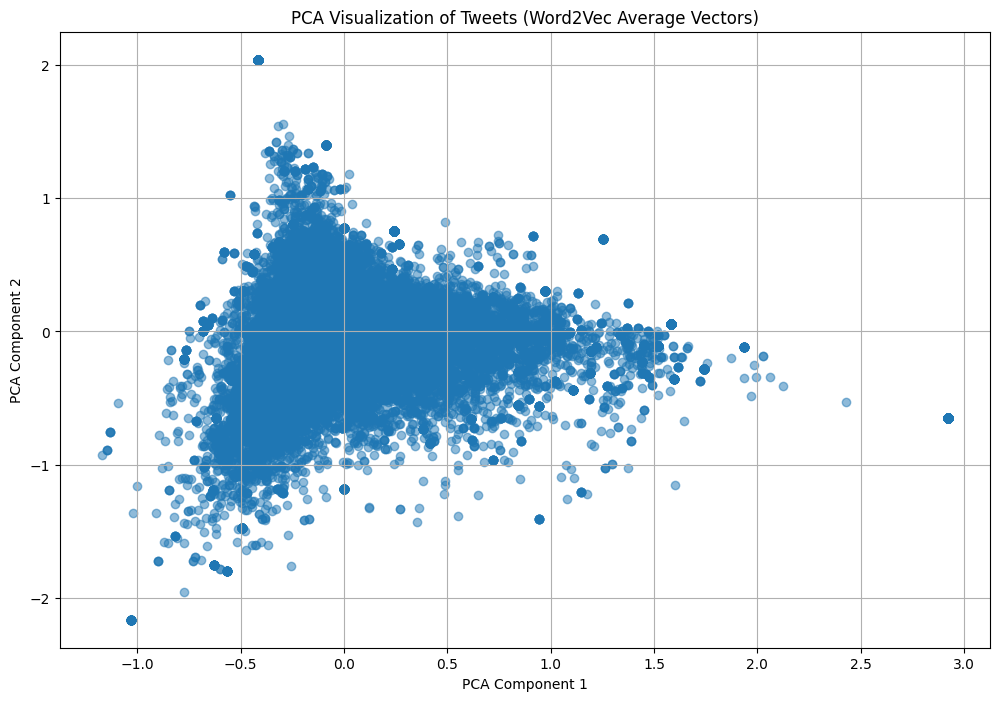

In [66]:
# Check and enable GPU in Google Colab
import torch

# Check if GPU is available and display the device name
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
    print("CUDA is not available. Using CPU.")

# Load necessary libraries
import pandas as pd
import numpy as np
import gensim.downloader as api
import torch.nn.functional as F
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load pre-trained Word2Vec model (Google News)
word_vectors = api.load("word2vec-google-news-300")

# Function to compute the average word vector for a tweet on the GPU
def average_word_vector(tweet, model):
    words = tweet.split()
    valid_vectors = []

    # Collect valid vectors
    for word in words:
        if word in model:
            valid_vectors.append(model[word])

    if valid_vectors:
        # Move to GPU and compute the average vector
        avg_vector = torch.mean(torch.tensor(valid_vectors).to(device), axis=0)
        return avg_vector
    else:
        return torch.zeros(model.vector_size, device=device)  # Return a zero vector if no valid words

# Compute the average word vector for each tweet
tweet_vectors = []
for tweet in df_tweets['processed_content']:
    tweet_vector = average_word_vector(tweet, word_vectors)
    tweet_vectors.append(tweet_vector.cpu().numpy())  # Move back to CPU for PCA

# Convert the list of vectors to a NumPy array
tweet_vectors = np.array(tweet_vectors)

# Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
pca_results = pca.fit_transform(tweet_vectors)

# Convert PCA results to DataFrame for easy plotting
pca_df = pd.DataFrame(data=pca_results, columns=['x', 'y'])

# Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(pca_df['x'], pca_df['y'], alpha=0.5)
plt.title('PCA Visualization of Tweets (Word2Vec Average Vectors)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()


In [67]:
loadings = pca.components_  # Shape: (n_components, n_features)

# Assuming word_vectors is your trained model from Gensim or similar
feature_names = word_vectors.index_to_key  # This should give you the correct tokens (words)

loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=feature_names[:loadings.shape[1]])  # Use the correct number of features

top_n = 10  # Number of top features to display
top_pc1 = loadings_df.nlargest(top_n, 'PC1')
top_pc2 = loadings_df.nlargest(top_n, 'PC2')

print("Top contributors to PC1:")
print(top_pc1)
print("\nTop contributors to PC2:")
print(top_pc2)


Top contributors to PC1:
              PC1       PC2
AP       0.180646  0.057579
early    0.160844  0.000907
was      0.159156 -0.035157
three    0.152206 -0.009421
month    0.138719 -0.001769
being    0.122850 -0.068438
ago      0.121238 -0.041485
players  0.116311  0.038117
what     0.103526  0.018123
sales    0.103079 -0.035506

Top contributors to PC2:
             PC1       PC2
still  -0.000083  0.171580
even    0.025650  0.169697
For    -0.008104  0.169337
has     0.071960  0.152434
know    0.093086  0.140153
$      -0.012211  0.136917
number -0.005993  0.125891
year    0.086481  0.117938
U.S.   -0.052445  0.112310
think   0.029909  0.106584


In [68]:
# Load necessary libraries
import gensim.downloader as api

# Load pre-trained Word2Vec model (Google News)
word_vectors = api.load("word2vec-google-news-300")

# List of keywords you want to check
keywords = ["farmer", "protest", "india", "agriculture", "government"]

# Check if each keyword is in the Word2Vec model's vocabulary
for word in keywords:
    if word in word_vectors:
        print(f"'{word}' is in the Word2Vec model.")
    else:
        print(f"'{word}' is NOT in the Word2Vec model.")


'farmer' is in the Word2Vec model.
'protest' is in the Word2Vec model.
'india' is in the Word2Vec model.
'agriculture' is in the Word2Vec model.
'government' is in the Word2Vec model.


Silhouette Score: 0.3280823230743408


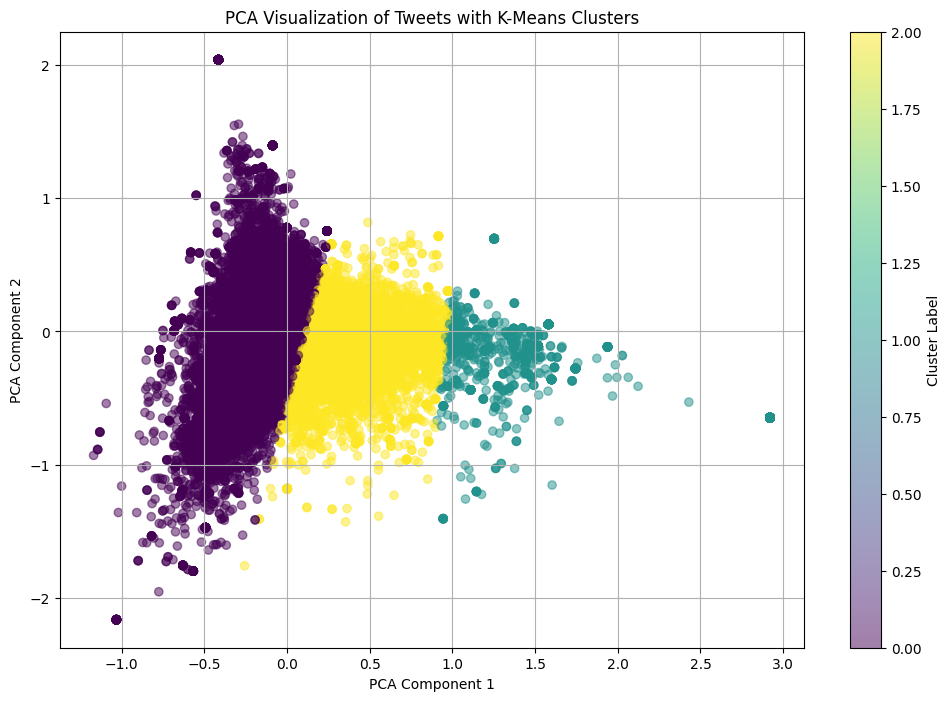

In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the number of clusters
k = 3  # You can choose this based on the Elbow Method

# Fit K-Means model
kmeans = KMeans(n_clusters=k, random_state=42)
pca_df['cluster'] = kmeans.fit_predict(pca_df[['x', 'y']])

# Optionally calculate the silhouette score
silhouette_avg = silhouette_score(pca_df[['x', 'y']], pca_df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Plot the PCA results with clusters
plt.figure(figsize=(12, 8))
plt.scatter(pca_df['x'], pca_df['y'], c=pca_df['cluster'], cmap='viridis', alpha=0.5)
plt.title('PCA Visualization of Tweets with K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.colorbar(label='Cluster Label')
plt.show()


In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  # Choose an appropriate number of clusters
pca_df['cluster'] = kmeans.fit_predict(tweet_vectors)


In [73]:
# Display random samples from each cluster
for cluster_id in pca_df['cluster'].unique():
    print(f"\nCluster {cluster_id} tweets:")
    tweets_in_cluster = df_tweets.iloc[pca_df['cluster'].values == cluster_id]['processed_content']
    print(tweets_in_cluster.sample(5, random_state=42))  # Display random samples from the cluster



Cluster 1 tweets:
date
2021-02-13 10:46:01+00:00       star sir mani celb support farmer check thread
2021-02-14 04:34:06+00:00    kerala fascism kerala caa kerala bjp kerala fa...
2021-02-24 04:05:21+00:00                  farmer feed everyon andhbhagat also
2021-02-13 19:50:38+00:00    thank much abus india brave individu like one ...
2021-02-17 20:40:52+00:00    stand solidar indian infinit solidar sympathi ...
Name: processed_content, dtype: object

Cluster 0 tweets:
date
2021-02-12 07:06:46+00:00                                               legend
2021-02-12 08:35:55+00:00    power supremaci use bulli abus farmer support ...
2021-02-22 12:25:02+00:00                     bhakat goon lowest sort superior
2021-02-15 03:36:54+00:00         silenc complic face injustic could speak act
2021-02-23 05:01:41+00:00                    beauti moment panjab land revolut
Name: processed_content, dtype: object

Cluster 2 tweets:
date
2021-02-18 06:15:16+00:00           respect
2021-02-24 05:11